# 인구소멸 위기지역 - 시각화( part 3)

In [30]:
!apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
mpl.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

In [33]:
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [34]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [36]:
data_folder = '/content/mnt/MyDrive/데이터/인구소멸위기지역'
pop = pd.read_csv(f'{data_folder}/시군구_ID부여.csv', encoding='euc-kr')
pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초


## 지도모양 보기

In [38]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [39]:
map_raw.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [41]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace = True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [42]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [43]:
!cp $data_folder/draw_map.py .

cp: cannot stat '/content/mnt/MyDrive/데이터/인구소멸위기지역/draw_map.py': No such file or directory


In [44]:
!ls -l

total 20
-rw------- 1 root root 5269 Sep  6 07:44 draw_map.py
drwx------ 5 root root 4096 Sep  6 04:03 mnt
drwxr-xr-x 2 root root 4096 Sep  6 07:44 __pycache__
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [45]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

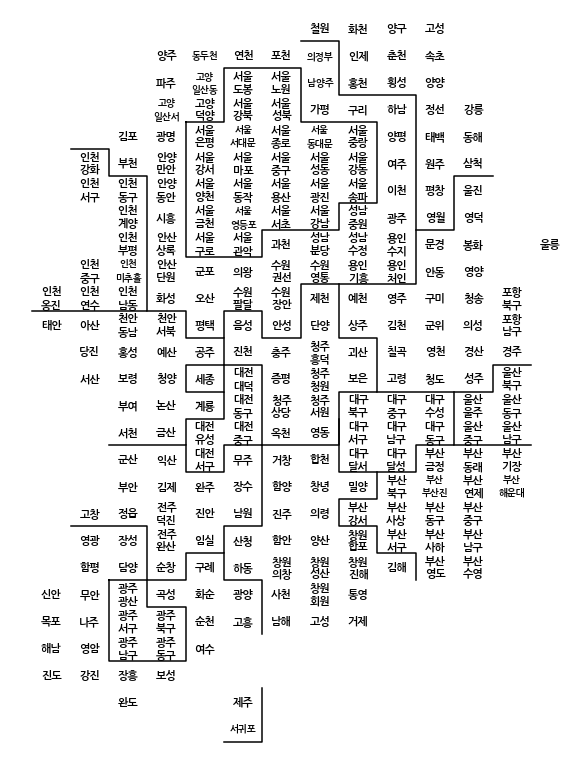

In [46]:
plt.figure(figsize=(8,11))
# 지역명
for idx, row in map.iterrows():
    #print(row.ID)
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
pop = pd.merge(pop, map, how = 'left', on = 'ID')
print(pop.shape)
pop.head()

(250, 14)


,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3.0,11.0
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0.0,10.0
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4.0,11.0
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5.0,11.0
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1.0,10.0


In [48]:
# Null 데이터가 있는지 확인
pop.isnull().sum().sum()

56

## 인구 현황 및 인구소멸 위기지역 확인
    - 시군구별 인구

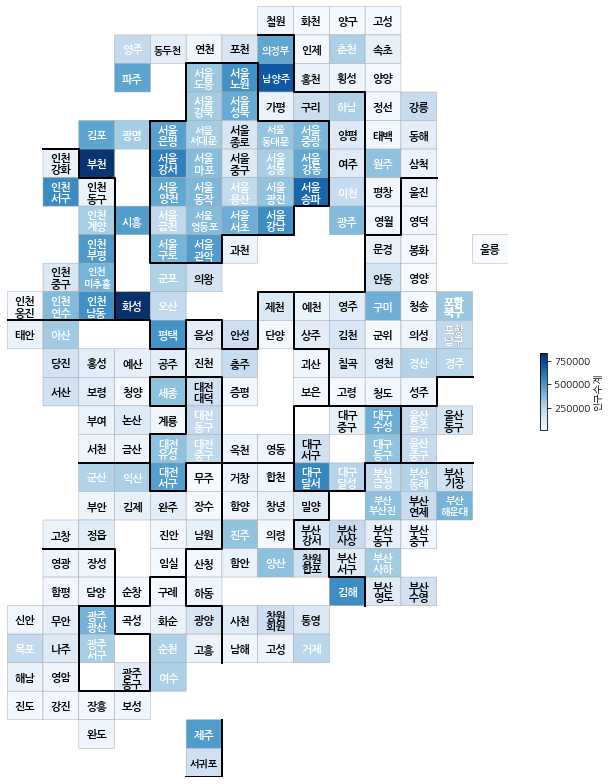

In [49]:
drawKorea('인구수계', pop, 'Blues')

- 인구소멸 위기지역

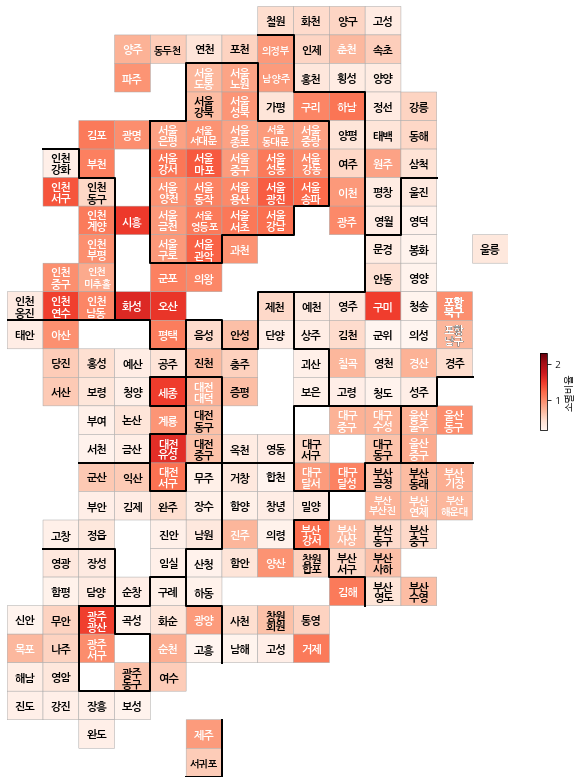

In [50]:
drawKorea('소멸비율', pop, 'Reds')

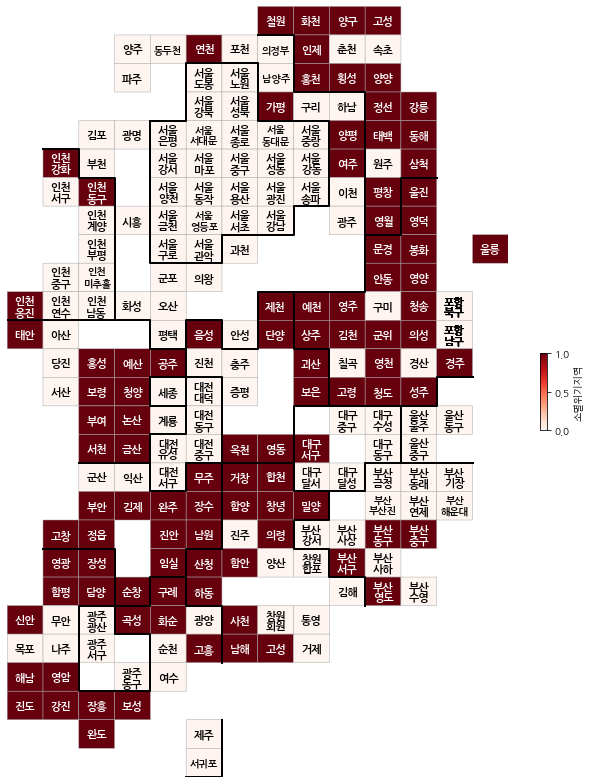

In [51]:
pop['소멸위기지역'] = pop.소멸위기지역.astype(int)
drawKorea('소멸위기지역', pop, 'Reds')

- 여성인구 확인

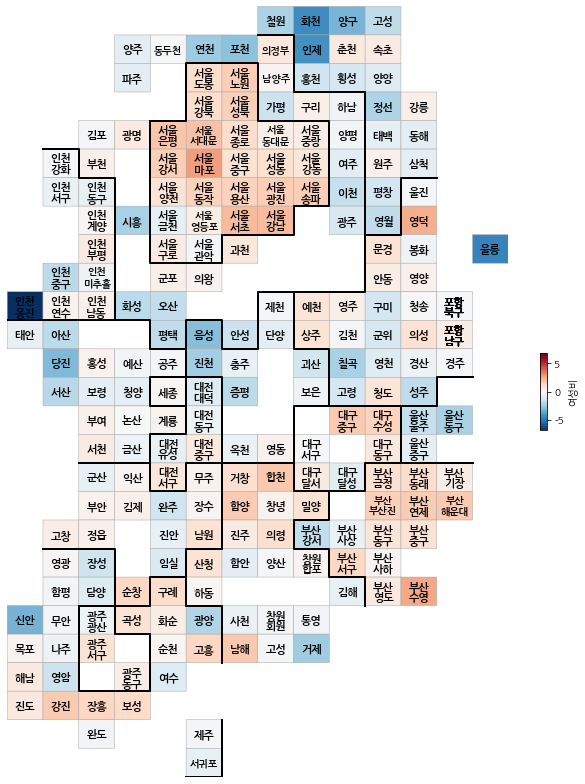

In [53]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) * 100
drawKoreaMinus('여성비', pop, 'RdBu_r')

- 20, 30 여성비

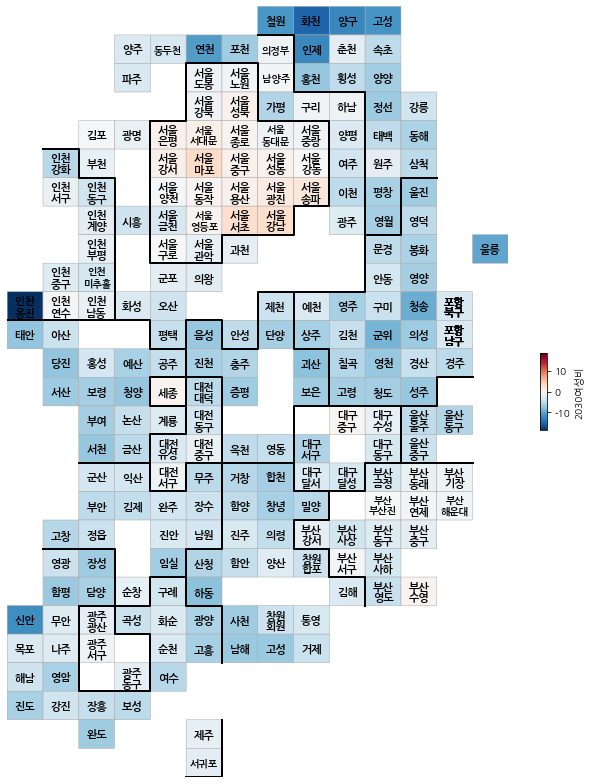

In [55]:
pop['2030여성비'] = (pop['20~39세여자'] / pop['20~39세계'] - 0.5) * 100
drawKoreaMinus('2030여성비', pop, 'RdBu_r')

## Folium 지도에서 인구소멸 위기지역 표시하기

In [56]:
import folium
import json

In [57]:
pop.set_index('ID', inplace=True)
pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,
강릉,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,1,False,3.0,11.0,0.376341,-3.608050
고성(강원),강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,1,False,0.0,10.0,-1.746790,-10.858731
동해,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,1,False,4.0,11.0,-0.740419,-5.903241
삼척,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,1,False,5.0,11.0,-0.706307,-4.965766
속초,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,0,False,1.0,10.0,0.535603,-4.806416


- 인구수

In [59]:
geo_data = json.load(open(f'{data_folder}/skorea_municipalities_geo_simple.json'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(
    geo_data=geo_data,
    data=pop.인구수계,
    columns=(pop.index, pop.인구수계),
    key_on='feature.id',
    fill_color='YlGnBu',
    legend_name='인구수'
).add_to(map)

title = '<h3 align="center" style="font-size:20px">기초자치단체별 인구수</h3>'
map.get_root().html.add_child(folium.Element(title))
map

- 인구소멸 위기지역

In [62]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(
    geo_data=geo_data,
    data=pop.소멸위기지역,
    columns=(pop.index, pop.소멸위기지역),
    key_on='feature.id',
    fill_color='PuRd'
).add_to(map)

title = '<h3 align="center" style="font-size:20px">소멸위기지역</h3>'
map.get_root().html.add_child(folium.Element(title))
map